### Load libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the datasets

In [3]:

customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

### Merge data for EDA

In [4]:

merged_data = pd.merge(transactions, customers, on='CustomerID')
merged_data = pd.merge(merged_data, products, on='ProductID')

### Basic EDA

In [5]:
print(customers.info())
print(products.info())
print(transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

### Business Insights

In [10]:
# 1. Top 5 customers by revenue
top_customers = merged_data.groupby('CustomerID')['TotalValue'].sum().nlargest(5)
print("Top Customers by Revenue:\n", top_customers)

# 2. Most popular product categories
popular_categories = merged_data['Category'].value_counts()
print("Most Popular Categories:\n", popular_categories)

# 3. Signup trends by region
signup_trends = customers.groupby('Region')['SignupDate'].count()
print("Signup Trends by Region:\n", signup_trends)

# 4. Transaction patterns over time
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
monthly_sales = merged_data.groupby(merged_data['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()
print("Monthly Sales:\n", monthly_sales)

Top Customers by Revenue:
 CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
Name: TotalValue, dtype: float64
Most Popular Categories:
 Category
Books          270
Electronics    254
Home Decor     248
Clothing       228
Name: count, dtype: int64
Signup Trends by Region:
 Region
Asia             45
Europe           50
North America    46
South America    59
Name: SignupDate, dtype: int64
Monthly Sales:
 TransactionDate
2023-12     3769.52
2024-01    66376.39
2024-02    51459.27
2024-03    47828.73
2024-04    57519.06
2024-05    64527.74
2024-06    48771.18
2024-07    71366.39
2024-08    63436.74
2024-09    70603.75
2024-10    47063.22
2024-11    38224.37
2024-12    59049.20
Freq: M, Name: TotalValue, dtype: float64


### Transaction patterns

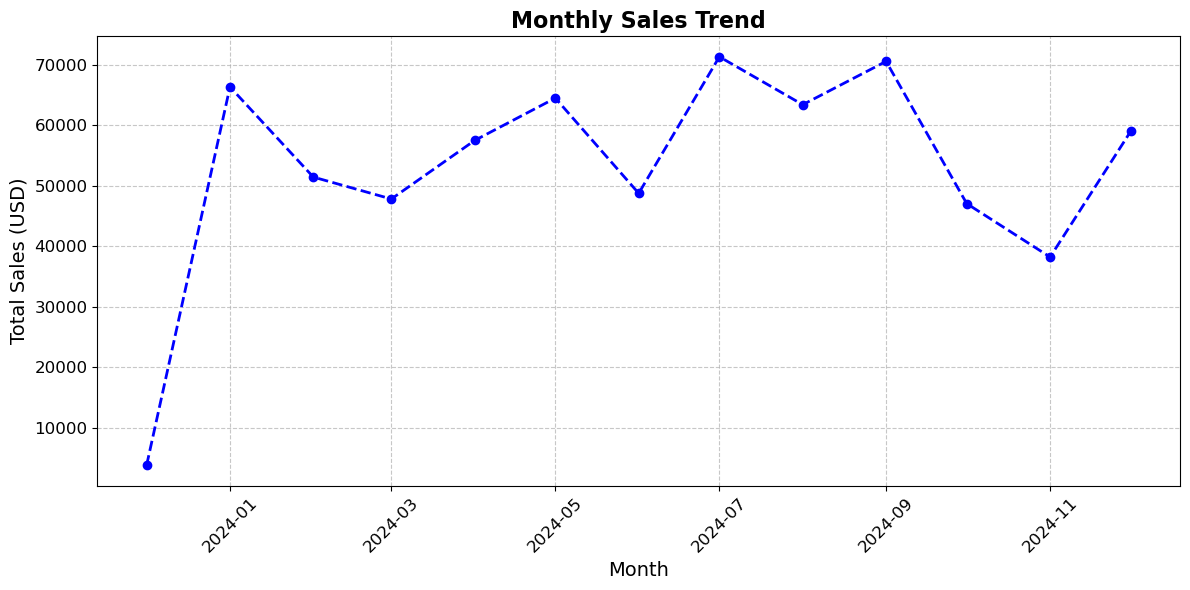

High-Value Customers:
 CustomerID
C0040    1323.133333
C0089    1278.110000
C0066    1266.426667
C0168    1263.457500
C0196    1245.720000
Name: TotalValue, dtype: float64


In [7]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index.to_timestamp(), monthly_sales.values, marker='o', linestyle='--', color='b', linewidth=2)
plt.title('Monthly Sales Trend', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Sales (USD)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 5. High-value customers
high_value_customers = merged_data.groupby('CustomerID')['TotalValue'].mean().nlargest(5)
print("High-Value Customers:\n", high_value_customers)

### Derive Business Insights

In [8]:
print("\nBusiness Insights:")
print("1. Top 5 customers drive a significant portion of the revenue. Focus on retaining them through loyalty programs.")
print("2. The most popular product categories can help prioritize inventory and marketing campaigns.")
print("3. Signup trends reveal which regions have the most potential for growth or need further penetration.")
print("4. Sales trends over time highlight seasonal demand. Align promotions accordingly.")
print("5. High average transaction value customers are premium buyers. Offer them personalized services to maximize retention.")



Business Insights:
1. Top 5 customers drive a significant portion of the revenue. Focus on retaining them through loyalty programs.
2. The most popular product categories can help prioritize inventory and marketing campaigns.
3. Signup trends reveal which regions have the most potential for growth or need further penetration.
4. Sales trends over time highlight seasonal demand. Align promotions accordingly.
5. High average transaction value customers are premium buyers. Offer them personalized services to maximize retention.
